## 1.Defining Problem Statement and Analysing basic metrics.

Netflix as one of the largest streaming platforms globally, constantly seeks to enhance its content library to cater to diverse audience preferences and expand its market reach. The objective is to analyze the existing dataset of Movies and TV Shows available on Netflix:
-    Identify which types of Shows/ Movies (in terms of genre/type etc.) are popular and should be prioritized for future production.
-    Understand how Netflix can grow its business in different countries by analyzing geographical content trends and preferences.
    
Basic Metrics:
-    Total Titles: The total number of Movies and TV Shows available on Netflix.
-    Content Distribution: The distribution of content across different types (Movies vs. TV Shows).
-    Country-Specific-Content: The number of title available in different countries.
-    Genre Distribution: The most common genres across Netflix library.
-    Year-wise-Content-Addition: The trend of content being added over the years.
These basic metrics will help in understanding the overall composition and distribution of the content on Netflix, providing a foundation for more detailed analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"data/data.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [3]:
print("Shape of the DataFrame:", df.shape)
print("\nData Types of each column:")
print(df.dtypes)

categorical_columns = ['type', 'country', 'rating', 'listed_in', 'director', 'cast']

for column in categorical_columns:
    df[column] = df[column].astype('category')

print("\nUpdated Data Types after converting categorical attributes to 'category':")
print(df.dtypes)

print("\nMissing Values in each column:")
print(df.isnull().sum())

print("\nStatistical Summary of numerical columns:")
print(df.describe())

print("\nStatistical Summary of categorical columns:")
print(df.describe(include='category'))

Shape of the DataFrame: (8807, 12)

Data Types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Updated Data Types after converting categorical attributes to 'category':
show_id           object
type            category
title             object
director        category
cast            category
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in       category
description       object
dtype: object

Missing Values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in       

## 3. Non-Graphical Analysis: Value counts and unique attributes 

In [4]:
print("Value Counts for 'type' column:")
print(df['type'].value_counts())

print("\nValue Counts for 'rating' column:")
print(df['rating'].value_counts())

print("\nValue Counts for 'country' column (Top 10):")
print(df['country'].value_counts().head(10))

print("\nUnique Genres (listed_in):")
unique_genres = df['listed_in'].str.split(', ').explode().unique()
print(unique_genres)

print("\nNumber of Unique Genres:")
print(len(unique_genres))

print("\nUnique Directors:")
unique_directors = df['director'].str.split(', ').explode().unique()
print(unique_directors[:10])

print("\nNumber of Unique Directors:")
print(len(unique_directors))

print("\nUnique Actors (cast):")
unique_actors = df['cast'].str.split(', ').explode().unique()
print(unique_actors[:10])

print("\nNumber of Unique Actors:")
print(len(unique_actors))


Value Counts for 'type' column:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value Counts for 'rating' column:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: count, dtype: int64

Value Counts for 'country' column (Top 10):
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Unique Genres (listed_in):
['Documentaries' 'International TV Shows' 'TV Dramas' 'TV Mysteries'
 'Crime TV Shows' 'TV Action & Adventure' 'Docuseries' 'Reality TV'
 'Romantic TV Shows' 'TV Comedies' 'TV Horror' 'Children & Family Movies'


## 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [8]:
# Unnesting columns like 'cast', 'director', 'country' for detailed analysis
df_exploded = df.copy()

df_exploded = df_exploded.assign(
    cast=df_exploded['cast'].str.split(', ')
).explode('cast')

df_exploded = df_exploded.assign(
    director=df_exploded['director'].str.split(', ')
).explode('director')

df_exploded = df_exploded.assign(
    country=df_exploded['country'].str.split(', ')
).explode('country')
df_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,Ama Qamata,South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Khosi Ngema,South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Gail Mabalane,South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,,Thabang Molaba,South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015-01-01,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015-01-01,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015-01-01,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015-01-01,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

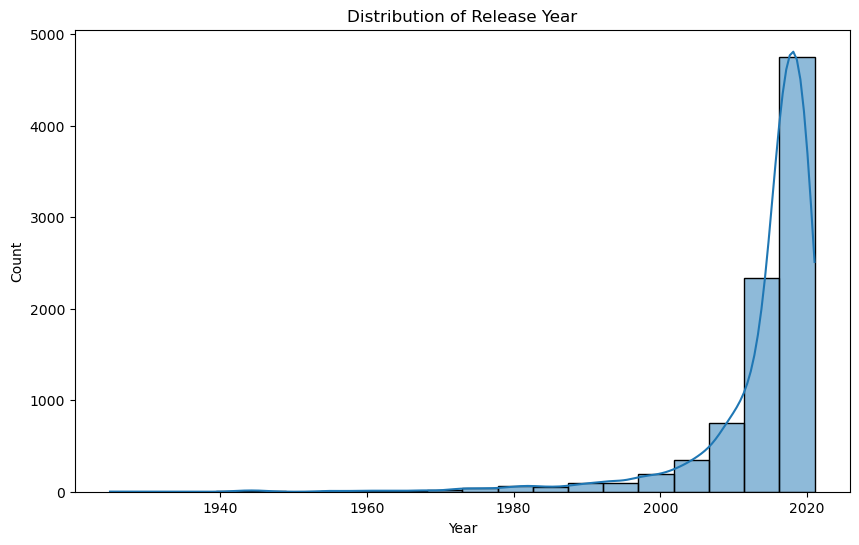

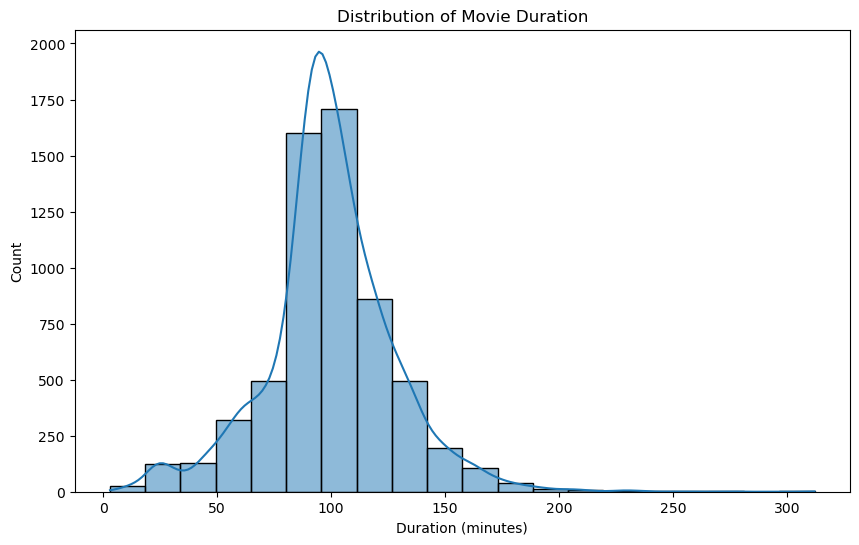

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=True, bins=20)
plt.title('Distribution of Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('Distribution_of_Release_Year.png')
plt.show()

df_movies = df[df['type'] == 'Movie'].dropna(subset = ["duration"])
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], kde=True, bins=20)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.savefig('Distribution_of_Movies_Duration.png')
plt.show()

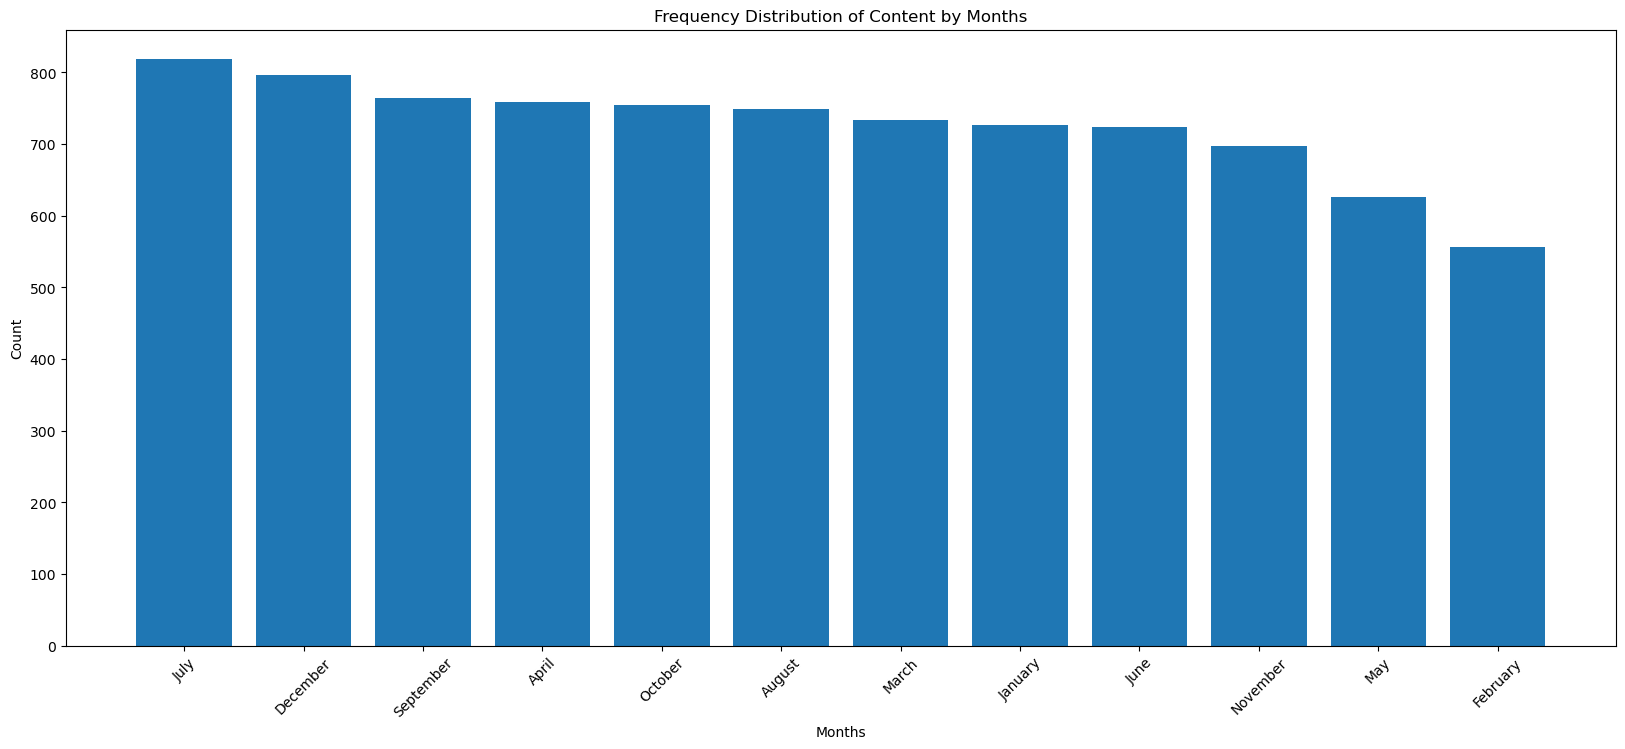

In [ ]:
monthly_counts = pd.to_datetime(df["date_added"], errors="coerce").dt.month_name().value_counts()
# Create the bar plot
plt.figure(figsize=[20,8])
plt.bar(monthly_counts.index, monthly_counts.values)

# Add labels and title
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Frequency Distribution of Content by Months')
plt.savefig('Frequency_Distribution_of_Content_by_Month.png')
# Show the plot
plt.show()

### 4.2 For categorical variable(s): Boxplot 

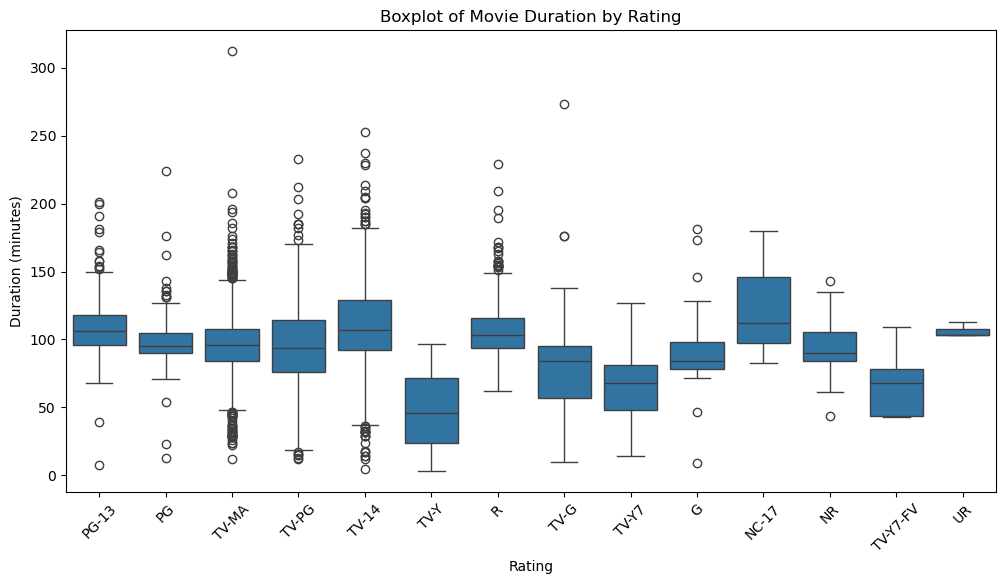

In [ ]:
# Boxplot for Movie Duration by Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=df_movies)
plt.title('Boxplot of Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.savefig('Boxplot_of_Movies_Duration_by_Rating.png')
plt.show()

### 4.3 For correlation: Heatmaps, Pairplots

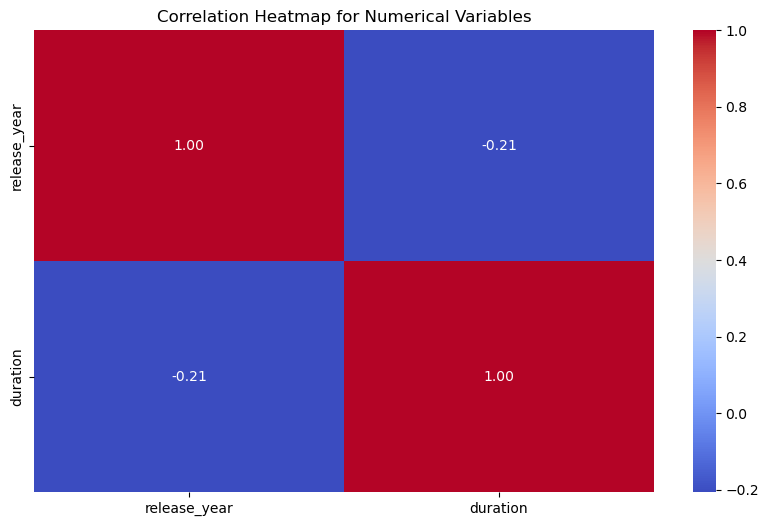

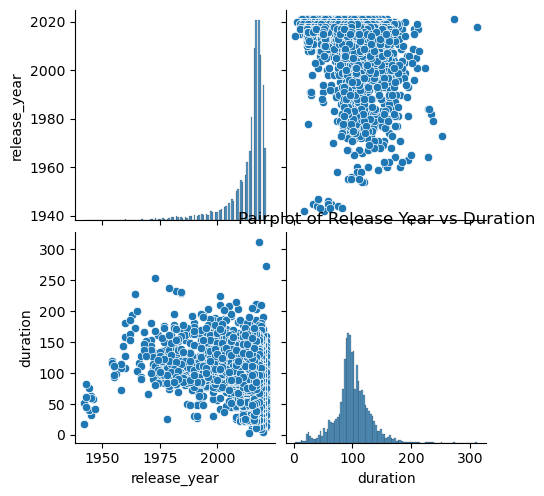

In [ ]:
# Correlation heatmap (using numerical attributes)
plt.figure(figsize=(10, 6))
corr_matrix = df_movies[['release_year', 'duration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plt.savefig('Correlation_Heatmap_for_Numerical_Variables.png')
plt.show()

# Pairplot to see relationships
sns.pairplot(df_movies[['release_year', 'duration']], kind='scatter')
plt.title('Pairplot of Release Year vs Duration')
plt.savefig('Pairplot_of_Release_Year_vs_Duration.png')
plt.show()

## 5. Missing Value & Outlier check

In [65]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values[missing_values > 0])

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage[missing_percentage > 0])


Missing Values in each column:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Percentage of missing values in each column:
director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64


In [66]:
# Outlier check for 'duration' in movies using IQR
Q1 = df_movies['duration'].quantile(0.25)
Q3 = df_movies['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_movies[(df_movies['duration'] < lower_bound) | (df_movies['duration'] > upper_bound)]
print(f"\nNumber of Outliers in 'duration': {outliers.shape[0]}")



Number of Outliers in 'duration': 450


## 6. Insights based on Non-Graphical and Visual Analysis

### 6.1 Comments on the range of attributes

Type: The dataset primarily consists of two types of content: Movies and TV Shows. The value counts typically show that movies outnumber TV shows.

Release Year: The release_year attribute ranges from early cinema years to the current era (e.g., from the 1920s to the 2020s), indicating a wide variety of content.

Duration: For movies, the typical range is from around 40 minutes to 250 minutes, with some extreme outliers.

Country: Netflix content spans numerous countries, with the top contributors usually being the United States, India, and the United Kingdom.

Genres: A rich variety of genres, with some common ones like "Drama," "Comedy," and "Documentaries" being dominant.

### 6.2 Comments on the distribution of the variables and relationship between them

Movies vs TV Shows: The distribution of content type shows that Netflix focuses more on movies than TV shows, but the gap has been narrowing in recent years, reflecting a growing trend in TV series production.

Release Year Distribution: The distribution is right-skewed, with a substantial increase in the number of titles released in the past two decades, highlighting Netflix's push for original content in recent years.

Duration: The movie duration distribution is right-skewed, with most movies falling between 80-120 minutes. A small number of very long or very short movies exist, which could be outliers or specialized content (e.g., short films or extended director's cuts).

Countries: The distribution of content by country shows the dominance of a few regions, indicating potential untapped markets where Netflix could expand.

### 6.3 Comments for each univariate and bivariate plot

Univariate Plots:

- Distribution of Release Year:
The distplot of release years shows a sharp rise in content production after 2010, reflecting Netflix's aggressive push for original programming and global content licensing.

- Movie Duration:
The distribution of movie durations has a peak around 100 minutes, which is the industry standard for feature films. However, the right-skewed tail suggests a few very long films that are atypical.

- Value Counts for Content Type:
The countplot shows that Netflix has historically favored movies, but TV shows are gaining traction, especially with the rising popularity of long-format streaming series.

Bivariate Plots:

- Boxplot of Movie Duration by Rating:
The boxplot reveals interesting patterns. For instance, movies rated G or PG tend to be shorter, while more mature content (e.g., rated TV-MA) shows a wider range in duration. This could reflect different content expectations for family vs. adult content.

- Heatmap of Correlations:
The correlation heatmap reveals minimal correlation between release_year and duration. This indicates that movie length has remained relatively stable over time, with no significant increase or decrease in duration trends.

## 7. Business Insights

Content Type Netflix has historically offered more movies, but TV shows are rapidly gaining popularity, especially since 2015, driven by the rise in serialized content and binge-watching.

Content Growth Since 2010, Netflix has aggressively expanded its content library, particularly focusing on original programming post-2015, shifting from a content distributor to a creator.

Movie Duration Most movies on Netflix fall between 80-120 minutes, but outliers like short films and documentaries cater to niche audiences.

Country-Specific Content The bulk of Netflix’s content originates from the U.S., India, and the U.K. However, Netflix is rapidly gaining traction in markets like South Korea and Brazil, signaling a need for more localized content.

Genres & Ratings Popular genres include drama, comedy, and documentary, with a majority of content rated (TV-MA) or (TV-14), appealing to mature audiences.

Rating-Duration Relationship Mature-rated movies (TV-MA) exhibit more variation in duration, while family-friendly films are generally shorter and follow a more consistent structure.

## Recommendations

Invest in TV Shows: Continue prioritizing original series across genres and countries, as TV shows drive higher engagement and retention.

Expand Localized Content: Focus on local content in emerging markets like South Korea and Brazil to boost global subscriber growth.

Short Films & Documentaries: Cater to the growing demand for short, impactful content like documentaries and short films.

Diversify Genres Globally: Offer more diverse genres (e.g., Thriller, Action) in underrepresented regions, especially for younger audiences in Southeast Asia and Latin America.

Increase Family-Friendly Content: Add more animated, educational, and kid-friendly content to capture the family segment.

Keep Content Fresh: Maintain a steady flow of new releases to stay competitive and attract both new and existing subscribers.

These actions will help strengthen Netflix’s global strategy and content appeal.